In [2]:
!mkdir -p ~/.kaggle                                                             #downloading zipped data in json 
!mv /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d anidiptapal/fraud-detection-1000-rows --unzip       #unzipping the data

mv: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/anidiptapal/fraud-detection-1000-rows
License(s): unknown
 96%|███████████████████████████████████████▌ | 257M/266M [00:02<00:00, 152MB/s]
100%|█████████████████████████████████████████| 266M/266M [00:02<00:00, 123MB/s]


DATA PREPROCESSING

In [1]:
import numpy as np     #    importing necessary modules
import pandas as pd     #for numerical analysis
import seaborn as sns    #for visualization
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/working/Fraud.csv')    #reading csv into dataframe

In [5]:
df.shape    #checking shape of dataframe

(6362620, 11)

In [6]:
df.head()  #checking column heads

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.describe()   #noting statistical data of numerical columns 

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.info()    #checking data type of every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


DATA CLEANING

In [9]:
df.isnull().sum()    #Conclusion : there are no missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df[df.duplicated()]      #Conlusion: there are no duplicated rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [11]:
df.nunique()     #checking the no of unique values in every column

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

FEATURE ENGINEERING

In [12]:
df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)   #dropping insignificant columns

In [13]:
df.describe()   #checking updated dataframe

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [14]:
from sklearn.preprocessing import LabelEncoder   #label encoding the type column
le=LabelEncoder ()
df['type'] = le.fit_transform(df['type'])

In [15]:
df.groupby('type')['isFraud'].value_counts()   #calculating no of fraudulent and legitimate columns typewise

type  isFraud
0     0          1399284
1     0          2233384
      1             4116
2     0            41432
3     0          2151495
4     0           528812
      1             4097
Name: count, dtype: int64

In [16]:
df['changebalanceOrg']=df['oldbalanceOrg']-df['newbalanceOrig']
df['changebalanceDest']=df['oldbalanceDest']-df['newbalanceDest']   #creation of new features

EXPLORATORY DATA ANALYSIS

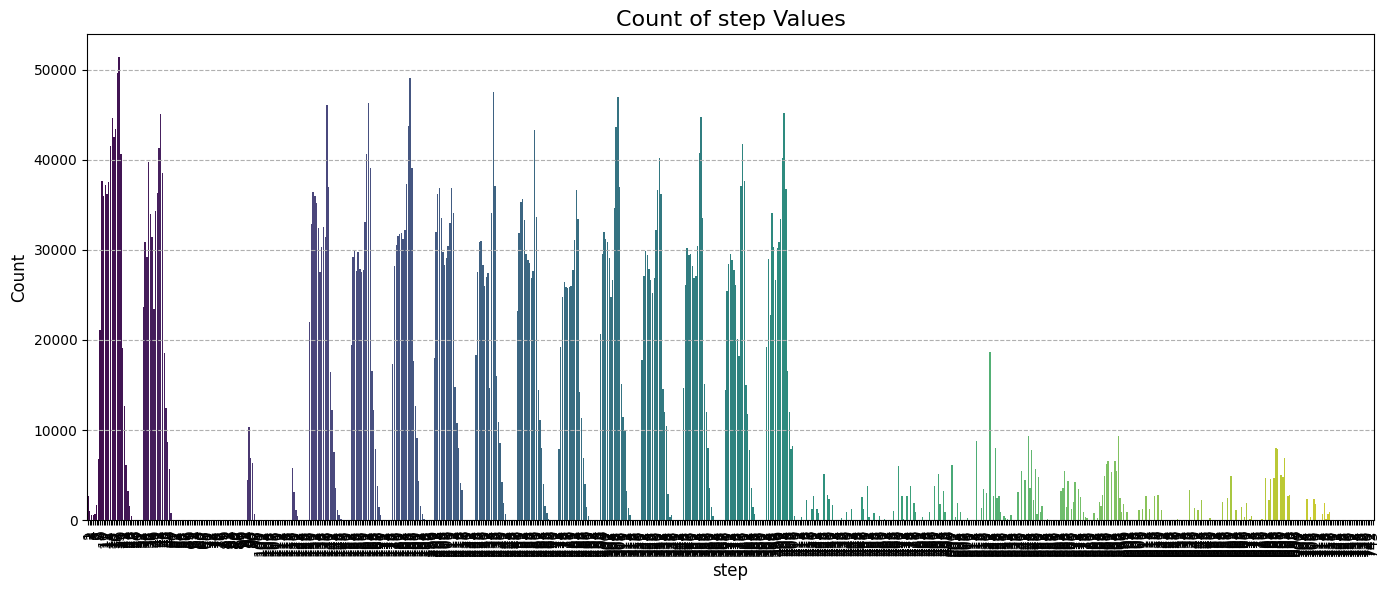

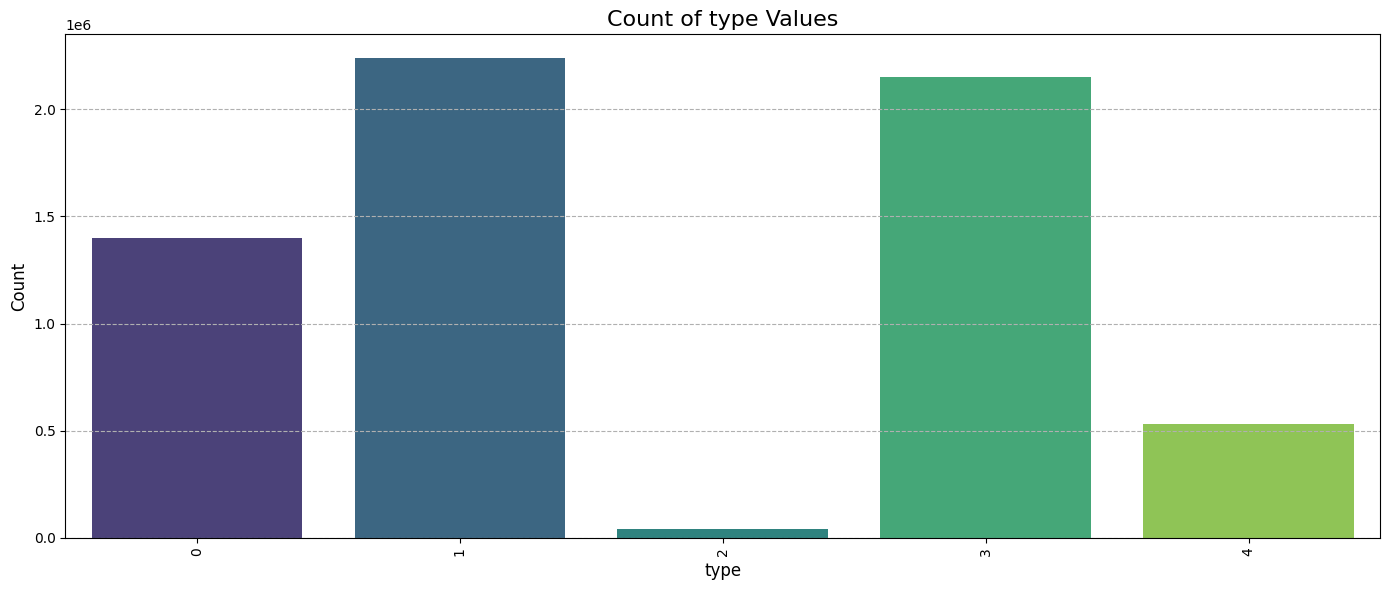

In [17]:
def count_plot(feature):
    plt.figure(figsize=(14, 6))
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.xticks(rotation=90)
    plt.title(f'Count of {feature} Values', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()
    print("\n")

columns = ['step', 'type']  #   univariate analysis of step and type
for feature in columns:
    count_plot(feature)


MULTIVARIATE ANALYSIS

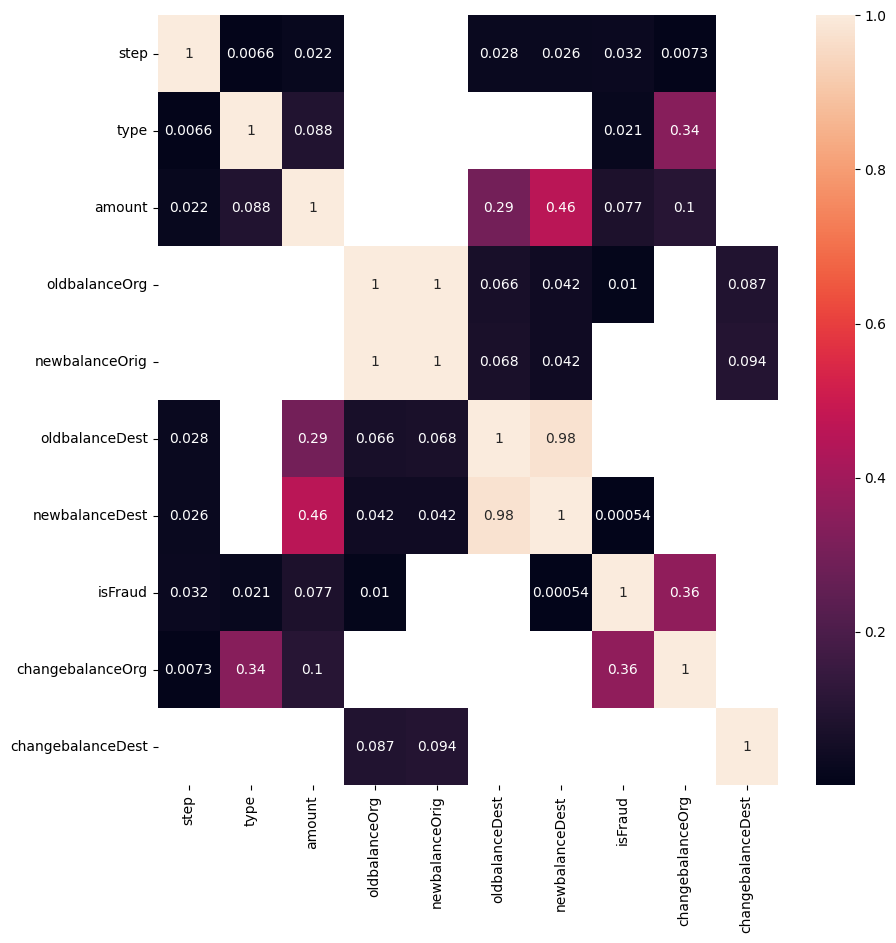

In [18]:
plt.figure(figsize=(10, 10))             #through correlation, finding most relevant dataframe columns
sns.heatmap(df.corr()[df.corr()>0], annot=True)
plt.show( )

In [19]:
df1= df[['step','type','amount','oldbalanceOrg','newbalanceDest','changebalanceOrg','isFraud']]   #creating an updated dataframe
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceDest,changebalanceOrg,isFraud
0,1,3,9839.64,170136.0,0.0,9839.64,0
1,1,3,1864.28,21249.0,0.0,1864.28,0
2,1,4,181.00,181.0,0.0,181.00,1
3,1,1,181.00,181.0,0.0,181.00,1
4,1,3,11668.14,41554.0,0.0,11668.14,0


In [20]:
df1.info()  #getting info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   step              int64  
 1   type              int64  
 2   amount            float64
 3   oldbalanceOrg     float64
 4   newbalanceDest    float64
 5   changebalanceOrg  float64
 6   isFraud           int64  
dtypes: float64(4), int64(3)
memory usage: 339.8 MB


UNIVARIATE ANALYSIS USING BOXPLOT AND HISTOGRAM AND ALSO CHECKING PDF

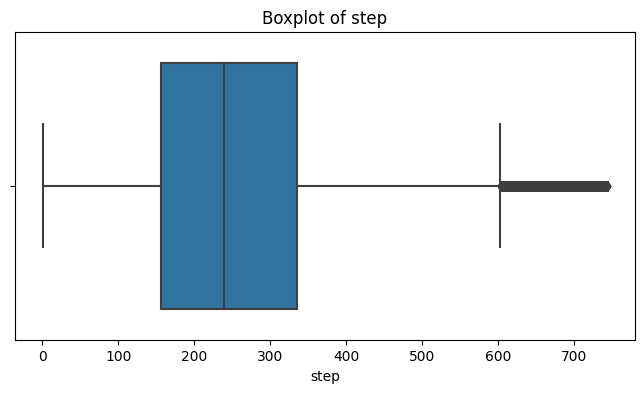

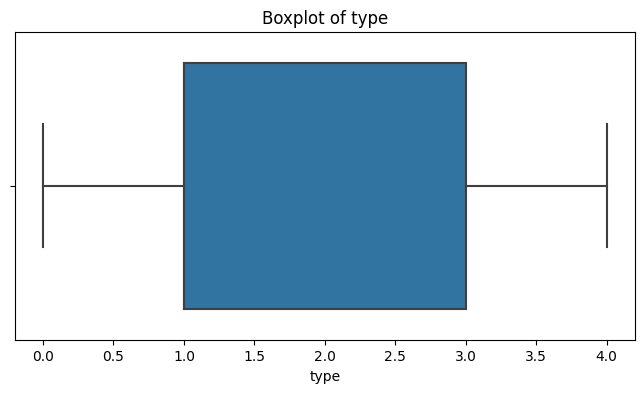

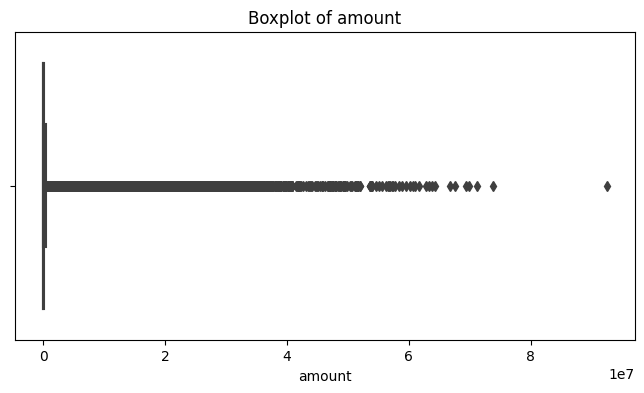

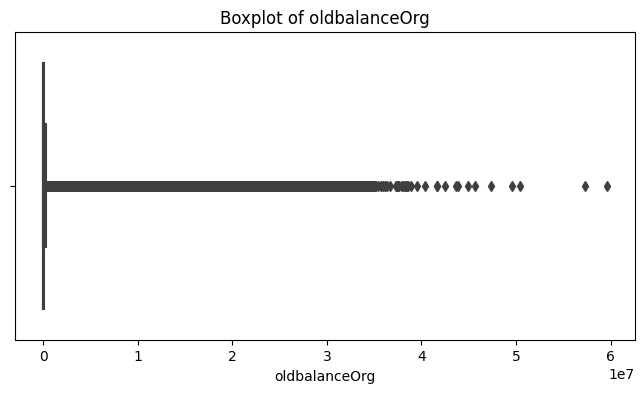

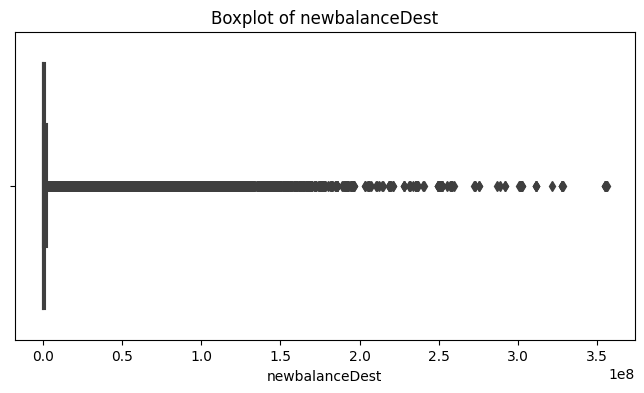

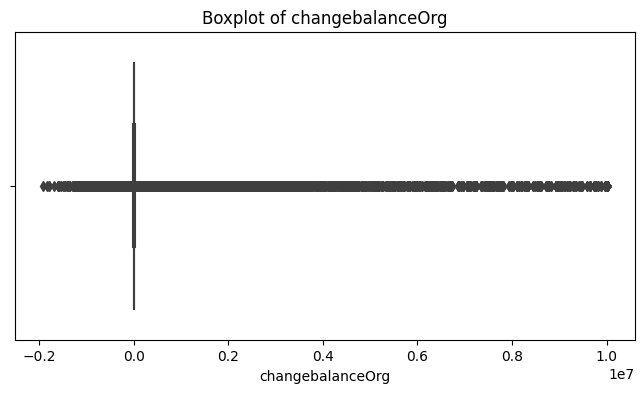

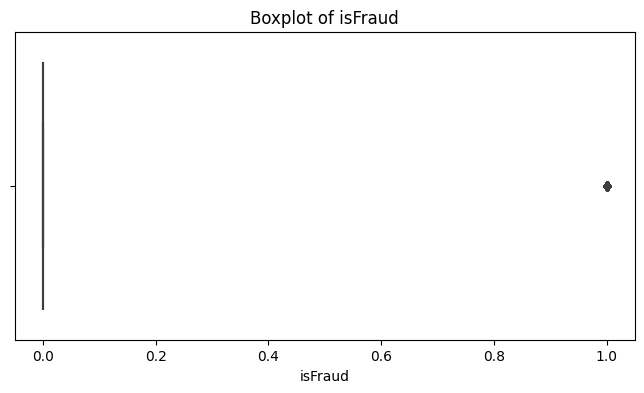

In [21]:
for column in df1.columns:  
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

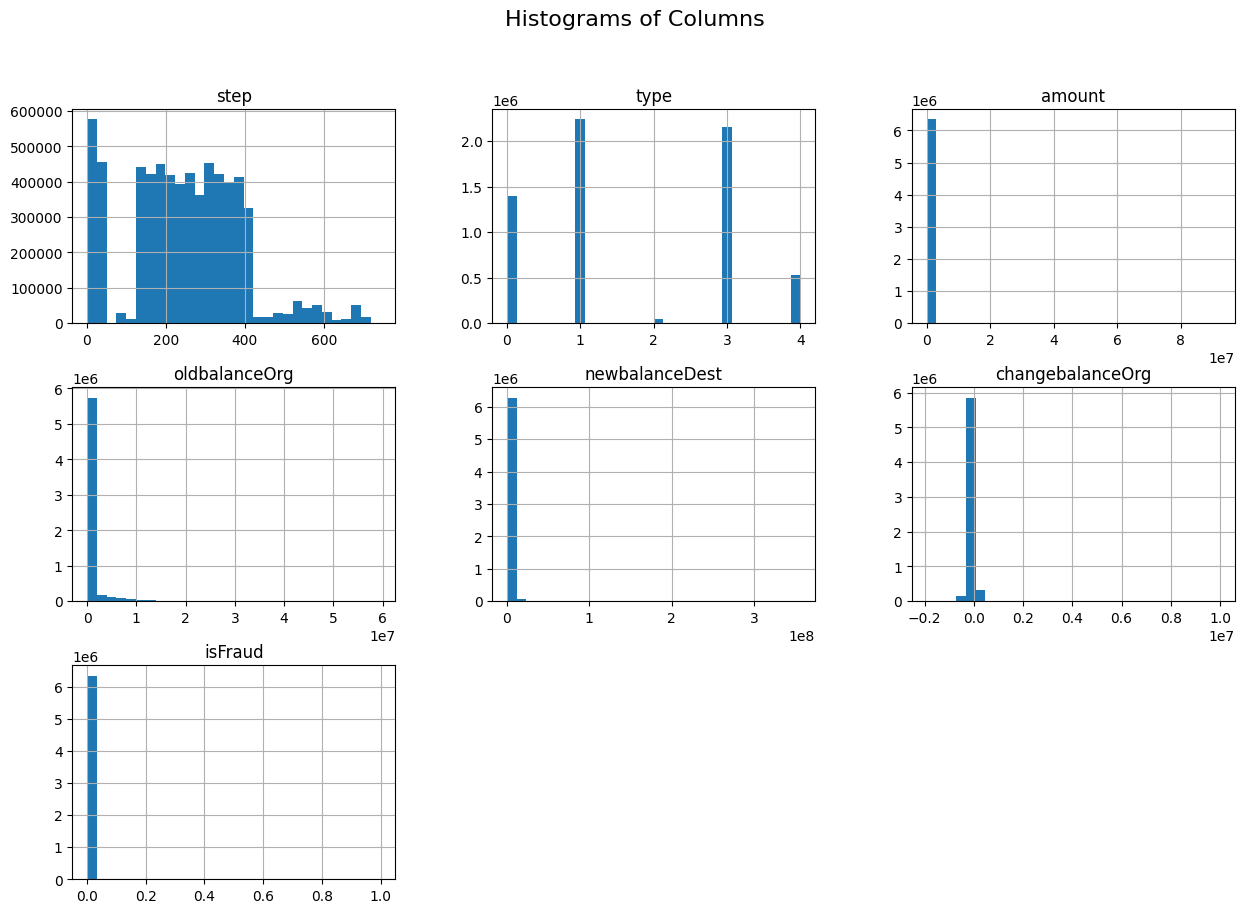

In [22]:
df1.hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Columns', fontsize=16)
plt.show()

In [23]:
df1.skew()     #checking skewness of all features

step                 0.375177
type                 0.196530
amount              30.993949
oldbalanceOrg        5.249136
newbalanceDest      19.352302
changebalanceOrg    24.630520
isFraud             27.779538
dtype: float64

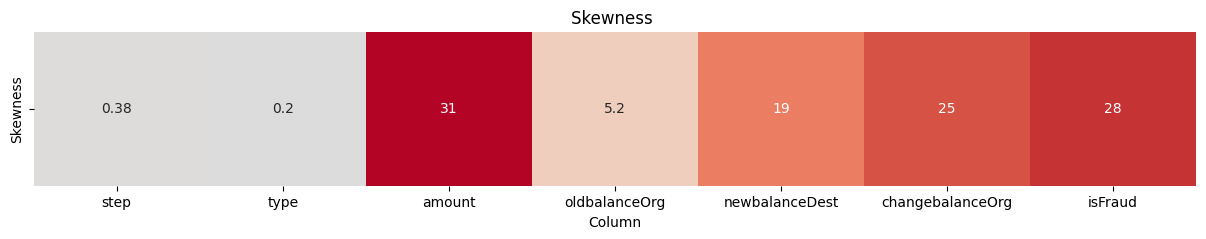

In [24]:
skewness = df1.skew()    #visualizing skewness
skewness_df = skewness.to_frame(name='Skewness').reset_index()
skewness_df.columns = ['Column', 'Skewness']

plt.figure(figsize=(15, 2))
sns.heatmap(skewness_df.set_index('Column').T, annot=True, cmap='coolwarm', cbar=False, center=0)
plt.title('Skewness ')
plt.show()

BIVARIATE ANALYSIS USING LINEPLOT AND VIOLINPLOT

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

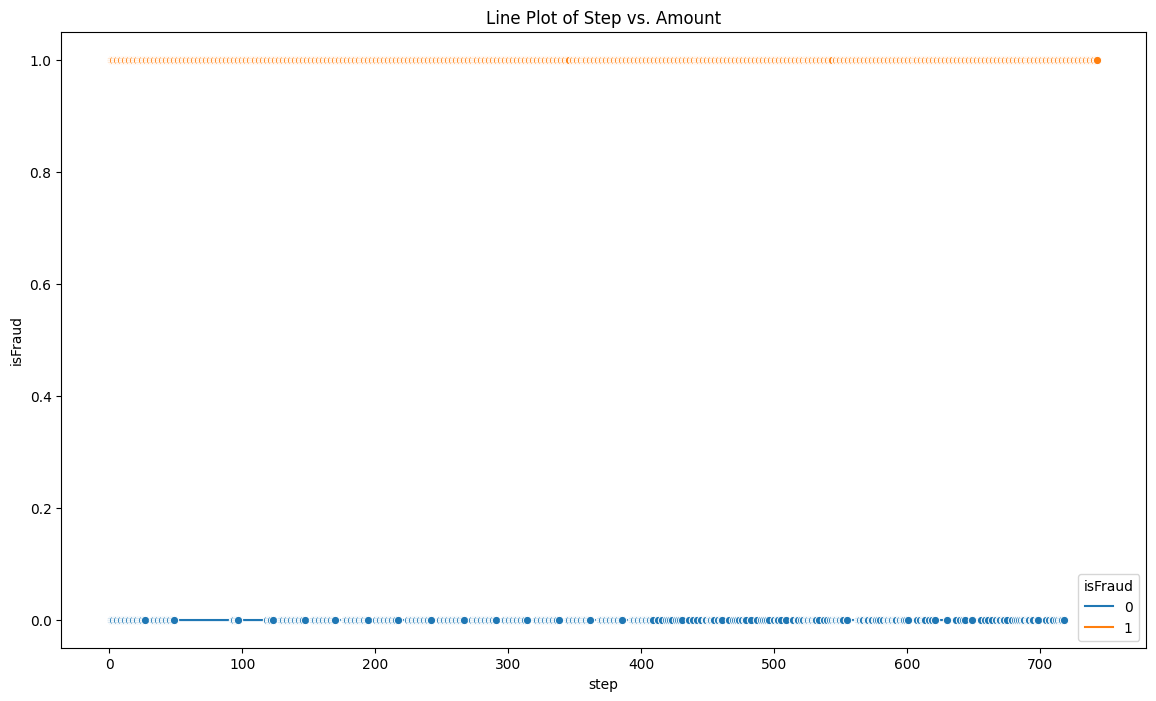

In [25]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df1, x='step', y='isFraud', hue='isFraud', marker='o')
plt.title('Line Plot of Step vs. Amount')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

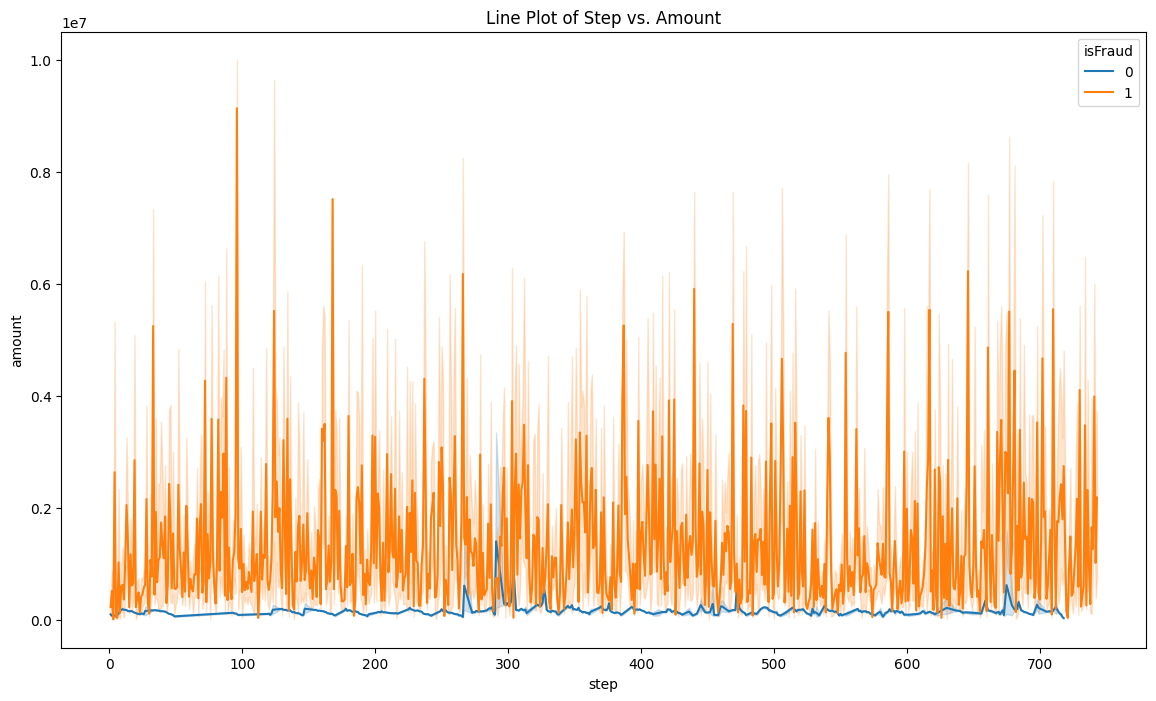

In [26]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df1, x='step', y='amount', hue='isFraud')
plt.title('Line Plot of Step vs. Amount')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

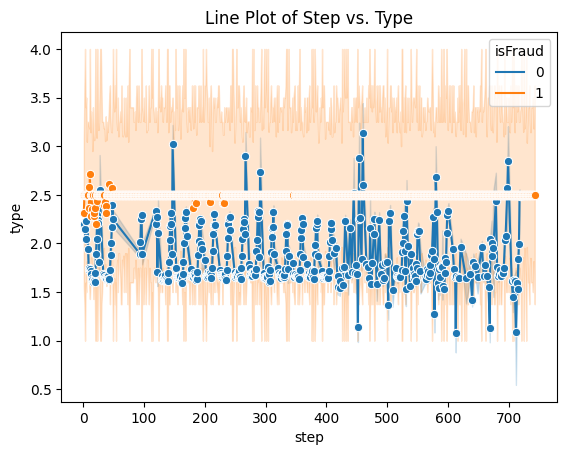

In [27]:
sns.lineplot(data=df1, x='step', y='type', hue='isFraud', marker='o')
plt.title('Line Plot of Step vs. Type')
plt.show()

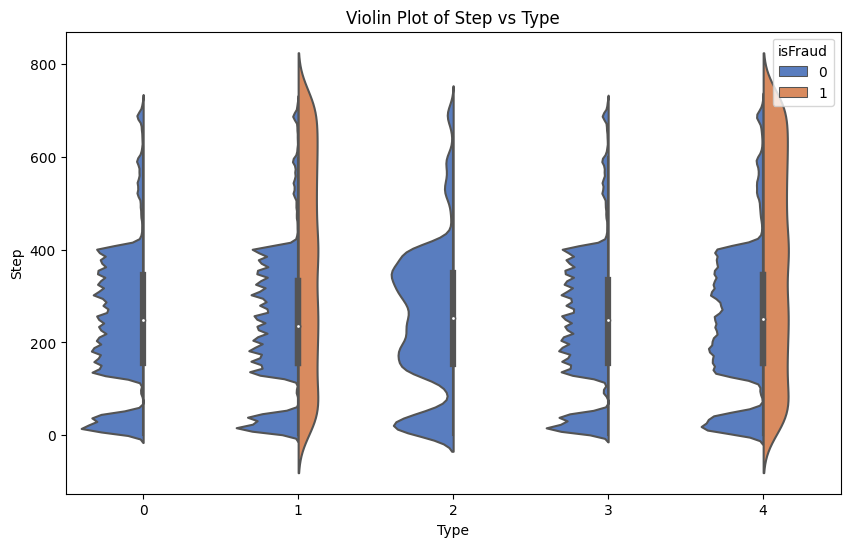

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df1, x='type', y='step', hue='isFraud', split=True, palette='muted')
plt.title('Violin Plot of Step vs Type')
plt.xlabel('Type')
plt.ylabel('Step')
plt.show()

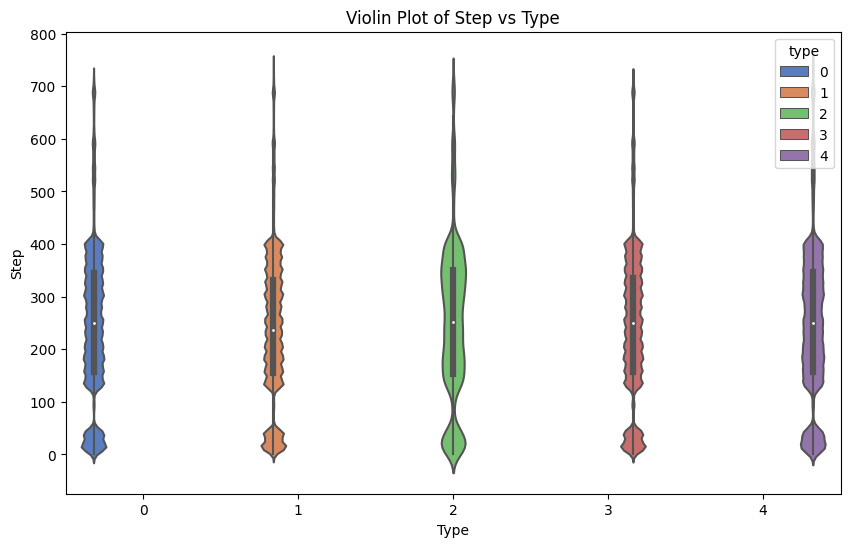

In [29]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df1, x='type', y='step', hue='type', palette='muted')
plt.title('Violin Plot of Step vs Type')
plt.xlabel('Type')
plt.ylabel('Step')
plt.show()

MACHINE LEARNING

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler   #importing modules

In [31]:
X = df1.drop('isFraud',axis=1)   
y = df1['isFraud'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   #splitting of dataset

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)    #scaling of data

In [32]:
X_train_scaled.shape

(5090096, 6)

In [33]:
X_test_scaled.shape

(1272524, 6)

In [71]:
t = y_train.values
tt = y_test.values   #converting to numpy array

type(t)

numpy.ndarray

Data preparation for CNN and LSTM models (discarded)

In [78]:
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)
y_train_cnn = t.reshape(-1,1,1)
y_test_cnn = tt.reshape(-1,1,1)

X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [44]:
t = X_train_cnn
t

array([[[ 2.63914941],
        [-1.2696211 ],
        [ 0.34345292],
        [ 1.32880177],
        [-0.30114711],
        [-2.4714832 ]],

       [[-0.55784138],
        [-1.2696211 ],
        [ 0.05435533],
        [-0.20740058],
        [-0.17188343],
        [-1.29447372]],

       [[ 0.97390366],
        [ 0.95248955],
        [-0.26560052],
        [-0.28741626],
        [-0.33378152],
        [ 0.16788859]],

       ...,

       [[ 0.74906035],
        [-0.52891755],
        [-0.28120584],
        [-0.26814157],
        [-0.2428652 ],
        [ 0.21488849]],

       [[ 0.44692715],
        [-0.52891755],
        [-0.17741639],
        [-0.28164719],
        [-0.24401339],
        [ 0.28059779]],

       [[-0.59297315],
        [-0.52891755],
        [-0.14969432],
        [-0.22075864],
        [-0.30931625],
        [ 0.75031431]]])

custom CNN model (discarded)

In [80]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2, strides=1),
    Conv1D(filters=32, kernel_size=3, activation='relu',padding='same'),
    MaxPooling1D(pool_size=2, strides=1),
    Conv1D(filters=16, kernel_size=3, activation='relu',padding='same'),
    MaxPooling1D(pool_size=2, strides=1),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])


cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [81]:
cnn_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_26 (Conv1D)              │ (None, 4, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_25 (MaxPooling1D) │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_27 (Conv1D)              │ (None, 3, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_26 (MaxPooling1D) │ (None, 2, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_28 (Conv1D)              │ (None, 2, 16)          │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_27 (MaxPooling1D) │ (None, 1, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,785 (57.75 KB)

 Trainable params: 14,785 (57.75 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
fraud = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 0.9994 - val_loss: 0.0030
Epoch 2/20
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9996 - val_loss: 0.0026
Epoch 3/20
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9995 - val_loss: 0.0024
Epoch 4/20
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 5/20
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9995 - val_loss: 0.0030
Epoch 6/20
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9995 - val_loss: 0.0024
Epoch 7/20
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 8/20
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - accuracy: 

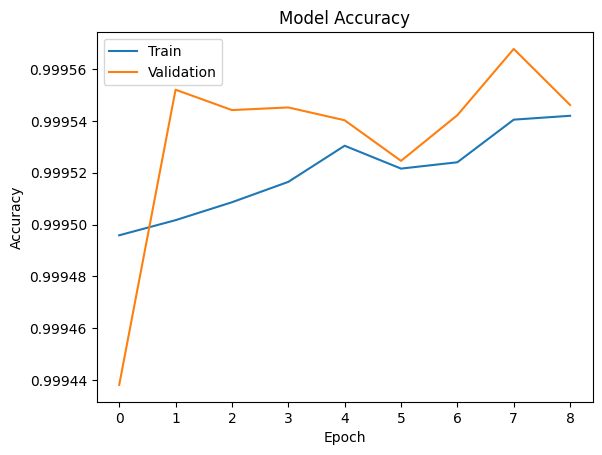

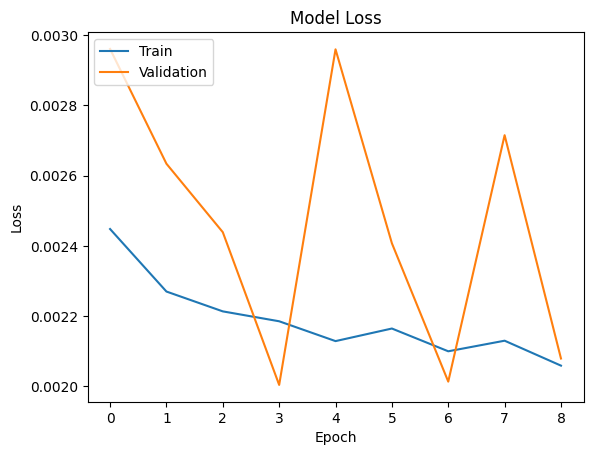

In [85]:
plt.plot(fraud.history['accuracy'])
plt.plot(fraud.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(fraud.history['loss'])
plt.plot(fraud.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [98]:
y_pred = cnn_model.predict(X_test_cnn)

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 53s 1ms/step


In [99]:
y_pred = y_pred.astype(int)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

LSTM model (discarded)

In [95]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

lstm_model = Sequential([
    LSTM(50, input_shape=(1, X_train_lstm.shape[2])),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

fraud2 = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 145s 4ms/step - accuracy: 0.9991 - loss: 0.0134 - val_accuracy: 0.9995 - val_loss: 0.0022
Epoch 2/10
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 143s 4ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 3/10
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 143s 4ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9996 - val_loss: 0.0019
Epoch 4/10
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 143s 4ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9993 - val_loss: 0.0023
Epoch 5/10
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 143s 5ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 6/10
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 144s 5ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9996 - val_loss: 0.0017
Epoch 7/10
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 144s 5ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 8/10
31814/31814 ━━━━━━━━━━━━━━━━━━━━ 144s 5ms/step - ac

In [96]:
lstm_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,005 (164.09 KB)

 Trainable params: 14,001 (54.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28,004 (109.39 KB)

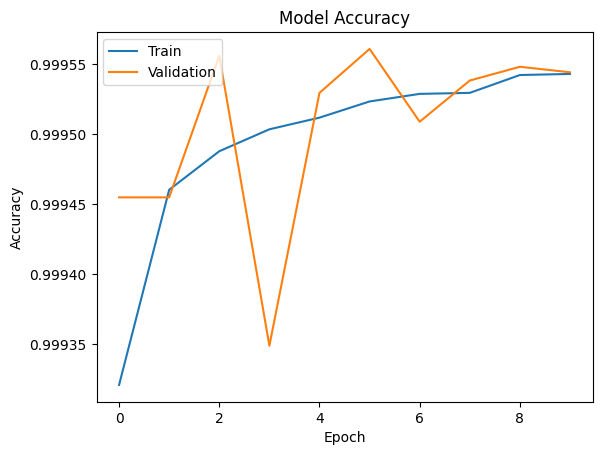

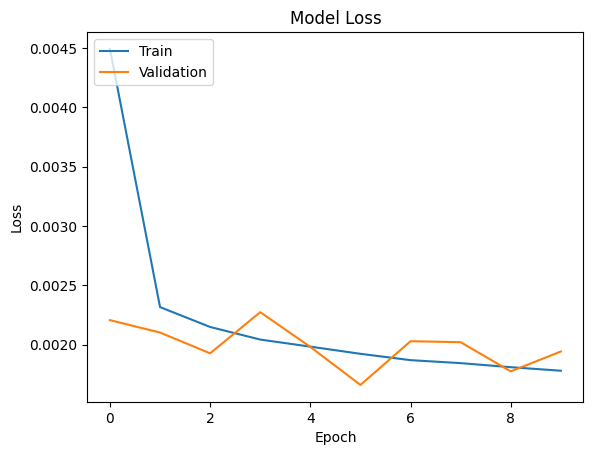

In [97]:
plt.plot(fraud2.history['accuracy'])
plt.plot(fraud2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(fraud2.history['loss'])
plt.plot(fraud2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [100]:
y_pred_lstm = lstm_model.predict(X_test_lstm)

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step


In [101]:
y_pred_lstm = y_pred_lstm.astype(int)
y_pred_lstm

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  #for CNN

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[1270902       2]
 [    975     645]]
Accuracy: 0.9992
Precision: 0.9969
Recall: 0.3981
F1 Score: 0.5690
ROC-AUC Score: 0.6991


In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  #for LSTM

conf_matrix = confusion_matrix(y_test, y_pred_lstm)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred_lstm)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred_lstm)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred_lstm)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred_lstm)
print(f"F1 Score: {f1:.4f}")

roc_auc = roc_auc_score(y_test, y_pred_lstm)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[1270904       0]
 [   1163     457]]
Accuracy: 0.9991
Precision: 1.0000
Recall: 0.2821
F1 Score: 0.4401
ROC-AUC Score: 0.6410


Data preparation for resultant Random Forest model (discarded)

In [104]:
cnn_features_train = cnn_model.predict(X_train_cnn)
cnn_features_test = cnn_model.predict(X_test_cnn)

lstm_features_train = lstm_model.predict(X_train_lstm)
lstm_features_test = lstm_model.predict(X_test_lstm)

159066/159066 ━━━━━━━━━━━━━━━━━━━━ 212s 1ms/step
39767/39767 ━━━━━━━━━━━━━━━━━━━━ 53s 1ms/step
159066/159066 ━━━━━━━━━━━━━━━━━━━━ 218s 1ms/step
39767/39767 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step


In [105]:
X_combined_train = np.concatenate((cnn_features_train, lstm_features_train), axis=1)
X_combined_test = np.concatenate((cnn_features_test, lstm_features_test), axis=1)

Random Forest classification (discarded)

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
fraud3 = rf_model.fit(X_combined_train, y_train)

In [108]:
y_pred_rf = rf_model.predict(X_combined_test)
classification_report(y_test, y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00   1270904\n           1       0.92      0.76      0.83      1620\n\n    accuracy                           1.00   1272524\n   macro avg       0.96      0.88      0.92   1272524\nweighted avg       1.00      1.00      1.00   1272524\n'

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score   #evaluation

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred_rf)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred_rf)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred_rf)
print(f"F1 Score: {f1:.4f}")

roc_auc = roc_auc_score(y_test, y_pred_rf)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[1270795     109]
 [    385    1235]]
Accuracy: 0.9996
Precision: 0.9189
Recall: 0.7623
F1 Score: 0.8333
ROC-AUC Score: 0.8811


Saving previous models before discarding them

In [112]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [118]:
import torch
lstm_model.save('lstm_model.h5')

In [119]:
cnn_model.save('cnn_model.h5')

NEW APPROACH TO TACKLE UNBALANCED DATA

In [120]:
!pip install imbalanced-learn matplotlib seaborn

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


USING SMOTE (later discarded)

In [122]:
from imblearn.over_sampling import SMOTE   

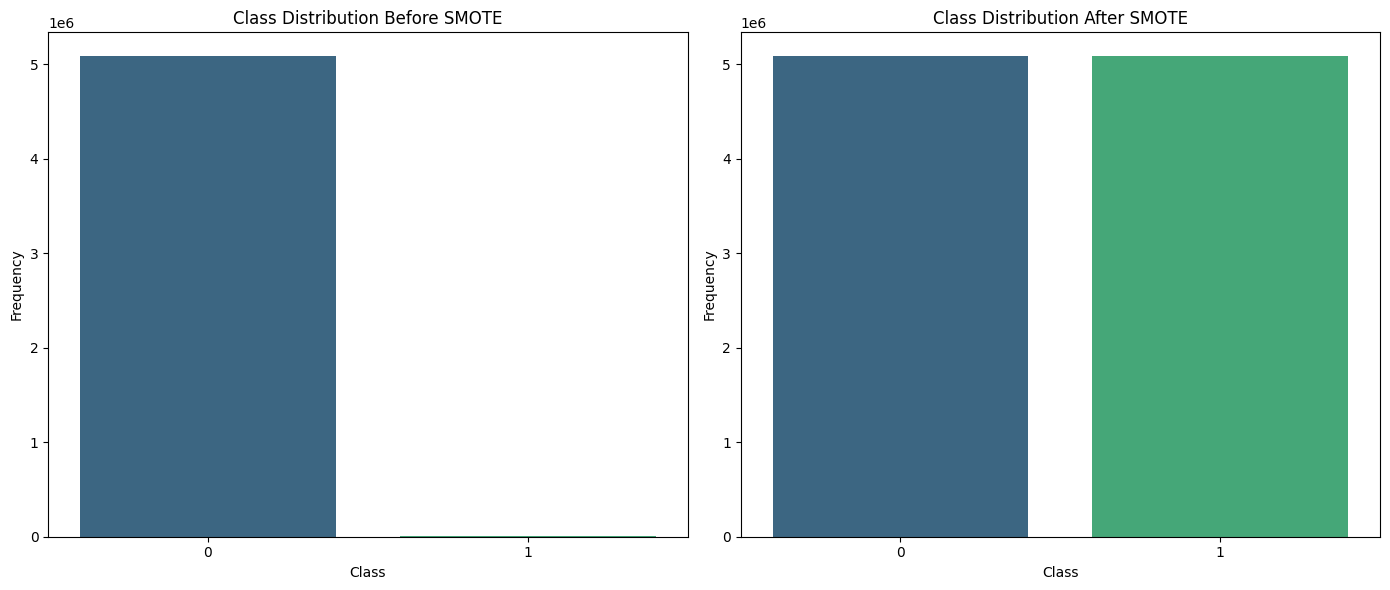

In [123]:
smote = SMOTE(random_state=42)                                      #SAMPLING OF DATA
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x=y_train, ax=axs[0], palette="viridis")
axs[0].set_title('Class Distribution Before SMOTE')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Frequency')

sns.countplot(x=y_resampled, ax=axs[1], palette="viridis")
axs[1].set_title('Class Distribution After SMOTE')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [124]:
X_resampled

,step,type,amount,oldbalanceOrg,newbalanceDest,changebalanceOrg
0,619,0,3.863851e+05,4.669569e+06,1.196500e+05,-3.863851e+05
1,164,0,2.124588e+05,2.346350e+05,5.935791e+05,-2.124588e+05
2,382,3,1.996760e+04,3.634000e+03,0.000000e+00,3.634000e+03
3,180,1,5.276165e+05,1.802160e+05,6.197736e+05,1.802160e+05
4,36,4,2.060679e+05,0.000000e+00,2.337562e+06,0.000000e+00
...,...,...,...,...,...,...
10167001,422,4,1.372728e+05,1.372728e+05,0.000000e+00,1.372728e+05
10167002,706,4,6.187172e+06,6.187172e+06,0.000000e+00,6.187172e+06
10167003,561,1,1.678578e+06,1.678578e+06,1.713059e+06,1.678578e+06
10167004,733,4,9.466618e+05,9.466618e+05,0.000000e+00,9.466618e+05


Using direct resampling approach

In [2]:
df=pd.read_csv('/kaggle/input/fraud-detection-1000-rows/df1.csv')
df

,step,type,amount,oldbalanceOrg,newbalanceDest,changebalanceOrg,isFraud
0,1,3,9839.64,170136.00,0.00,9839.64,0
1,1,3,1864.28,21249.00,0.00,1864.28,0
2,1,4,181.00,181.00,0.00,181.00,1
3,1,1,181.00,181.00,0.00,181.00,1
4,1,3,11668.14,41554.00,0.00,11668.14,0
...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,339682.13,339682.13,1
6362616,743,4,6311409.28,6311409.28,0.00,6311409.28,1
6362617,743,1,6311409.28,6311409.28,6379898.11,6311409.28,1
6362618,743,4,850002.52,850002.52,0.00,850002.52,1


In [11]:
import pandas as pd
from sklearn.utils import resample

df_0 = df[df.isFraud == 0]
df_1 = df[df.isFraud == 1]

df_minority_upsampled = resample(df_1, 
                                 replace=True,     
                                 n_samples=800000, 
                                 random_state=42)  

df_majority_downsampled = resample(df_0, 
                                   replace=False,    
                                   n_samples=2400000, 
                                   random_state=42)  

df = pd.concat([df_majority_downsampled, df_minority_upsampled])



In [12]:
df.isFraud.value_counts()

isFraud
0    2400000
1     800000
Name: count, dtype: int64

In [13]:
df.describe()

,step,type,amount,oldbalanceOrg,newbalanceDest,changebalanceOrg,isFraud
count,3.200000e+06,3.200000e+06,3.200000e+06,3.200000e+06,3.200000e+06,3.200000e+06,3.200000e+06
mean,2.747420e+02,1.910237e+00,4.998031e+05,1.036054e+06,1.241239e+06,3.455695e+05,2.500000e-01
std,1.727368e+02,1.430058e+00,1.421047e+06,3.077905e+06,3.814715e+06,1.357378e+06,4.330128e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.915268e+06,0.000000e+00
25%,1.580000e+02,1.000000e+00,1.980076e+04,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.580000e+02,1.000000e+00,1.165030e+05,4.001800e+04,1.719325e+05,3.788475e+03,0.000000e+00
75%,3.730000e+02,3.000000e+00,3.062040e+05,3.651148e+05,1.098673e+06,6.727925e+04,2.500000e-01
max,7.430000e+02,4.000000e+00,9.244552e+07,5.958504e+07,3.553805e+08,1.000000e+07,1.000000e+00


In [14]:
df.groupby('type')['isFraud'].value_counts()

type  isFraud
0     0          528438
1     0          843278
      1          399952
2     0           15543
3     0          812715
4     1          400048
      0          200026
Name: count, dtype: int64

In [15]:
df.to_csv("/kaggle/working/new_df1.csv", index=False)

<Axes: ylabel='count'>

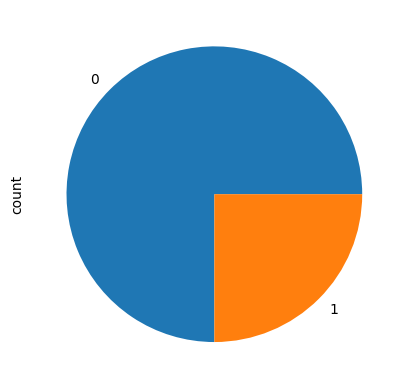

In [17]:
df.isFraud.value_counts().plot( kind='pie')  #understanding the resampled data

In [3]:
df=pd.read_csv('/kaggle/input/frauddd/new_df1.csv')

Final Approach of models

In [4]:
import numpy as np    #importing necessary modules
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score, 
                             roc_curve, recall_score, f1_score, precision_score, 
                             confusion_matrix, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt

X = df.drop('isFraud', axis=1).values
y = df['isFraud'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RANDOM FOREST CLASSIFIER

In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

CATBOOST CLASSIFIER

In [6]:
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=100)
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10)

0:	learn: 0.4696873	test: 0.4693584	best: 0.4693584 (0)	total: 348ms	remaining: 2m 53s
100:	learn: 0.0229584	test: 0.0231310	best: 0.0231310 (100)	total: 27s	remaining: 1m 46s
200:	learn: 0.0156701	test: 0.0158946	best: 0.0158946 (200)	total: 53.8s	remaining: 1m 19s
300:	learn: 0.0123449	test: 0.0125084	best: 0.0125084 (300)	total: 1m 20s	remaining: 53.2s
400:	learn: 0.0103909	test: 0.0105707	best: 0.0105707 (400)	total: 1m 46s	remaining: 26.4s
499:	learn: 0.0086855	test: 0.0089266	best: 0.0089266 (499)	total: 2m 13s	remaining: 0us

bestTest = 0.008926647033
bestIteration = 499



USAGE OF VOTING CLASSIFIER ENSEMBLE

In [7]:

# Define the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('catboost', catboost_model)
    ],
    voting='soft' 
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)
y_proba = voting_clf.predict_proba(X_test)[:, 1]


0:	learn: 0.4696873	total: 280ms	remaining: 2m 19s
100:	learn: 0.0229584	total: 26.2s	remaining: 1m 43s
200:	learn: 0.0156701	total: 52s	remaining: 1m 17s
300:	learn: 0.0123449	total: 1m 17s	remaining: 51.5s
400:	learn: 0.0103909	total: 1m 43s	remaining: 25.6s
499:	learn: 0.0086855	total: 2m 8s	remaining: 0us


FINAL EVALUATION ON RESAMPLED DATA AND NEW ENSEMBLE MODELS

Accuracy: 0.999315625
Recall: 1.0
Precision: 0.997273915478932
F1 Score: 0.9986350973194308
AUC: 0.9999989445481763
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    479768
           1       1.00      1.00      1.00    160232

    accuracy                           1.00    640000
   macro avg       1.00      1.00      1.00    640000
weighted avg       1.00      1.00      1.00    640000

Confusion Matrix:
 [[479330    438]
 [     0 160232]]


<Figure size 800x600 with 0 Axes>

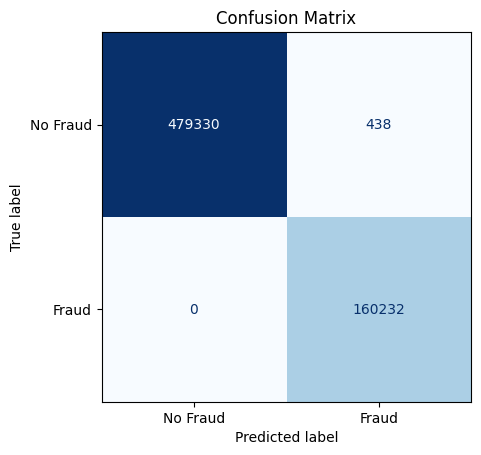

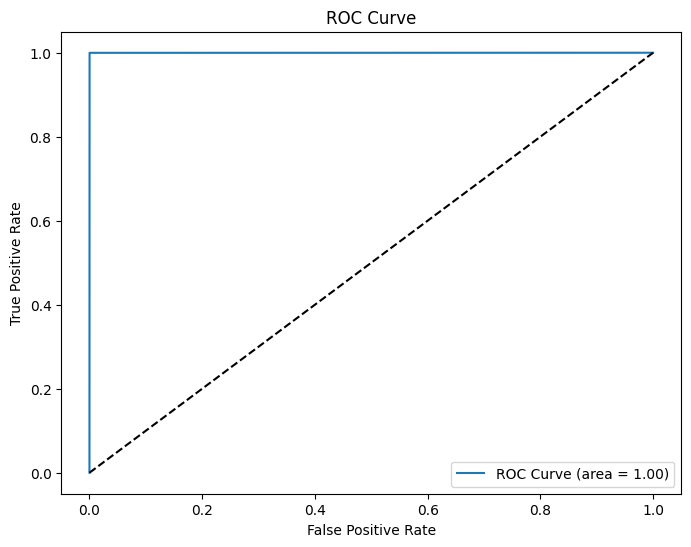

In [8]:

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate additional metrics
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("AUC:", roc_auc)
print("Classification Report:\n", classification_rep)

# Print and plot Confusion Matrix
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Fraud', 'Fraud'])
disp.plot(cmap='Blues', values_format='d', colorbar=False)
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


FINAL SAVING OF LATEST MODELS

In [10]:
import pickle

with open('voting_clf_model.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)


In [11]:
with open('voting_clf_model.pt', 'wb') as f:
    pickle.dump(voting_clf, f)